In [1]:
import json
import os
from timeit import default_timer

import numpy as np
from pyscf import gto, scf

from tn4qa.dmrg import FermionDMRG, QubitDMRG

np.random.seed(1)
cwd = os.getcwd()

def test_QubitDMRG(filename, max_bond):
    location = os.path.join(cwd, filename)
    with open(location) as f:
        ham_dict = json.load(f)
    dmrg = QubitDMRG(ham_dict, max_mps_bond=max_bond, method="one-site")
    energy, _ = dmrg.run(20)
    return dmrg.all_energies


def test_timings(filename):
    start = default_timer()
    location = os.path.join(cwd, filename)
    with open(location) as f:
        ham = json.load(f)
    ham_dict = {k: float(v[0]) for k, v in ham.items()}
    dmrg = QubitDMRG(ham_dict, 4)
    energy, _ = dmrg.run(2)
    stop1 = default_timer()
    return energy, stop1 - start


In [2]:
def run_max_bond(max_bond):
    outputs = {}
    outputs["knto"]= test_QubitDMRG("hamiltonians/knto.json", max_bond)
    outputs["jkmn"] = test_QubitDMRG("hamiltonians/jkmn.json", max_bond)
    outputs["jw"] = test_QubitDMRG("hamiltonians/jw.json", max_bond)
    outputs["pe"]= test_QubitDMRG("hamiltonians/pe.json", max_bond)
    outputs["bk"] = test_QubitDMRG("hamiltonians/bk.json", max_bond)
    outputs["swapped_knto"] = test_QubitDMRG("hamiltonians/xz_swapped_knto.json", max_bond)
    return outputs

In [3]:
two = run_max_bond(2)
four = run_max_bond(4)
eight = run_max_bond(8)
twelve = run_max_bond(12)

In [11]:
sixteen = run_max_bond(16)

In [12]:
vals = {"2":two, "4":four, "8":eight, "12":twelve, "16":sixteen}

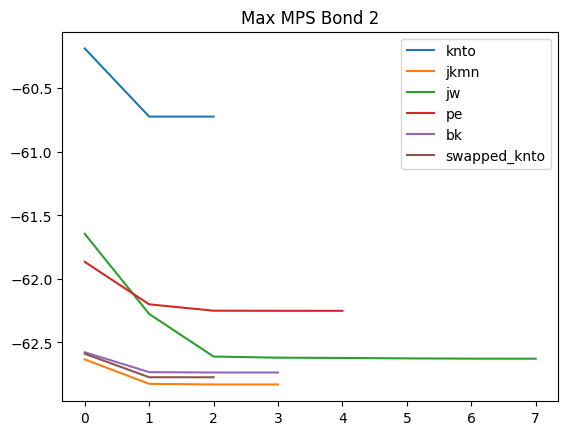

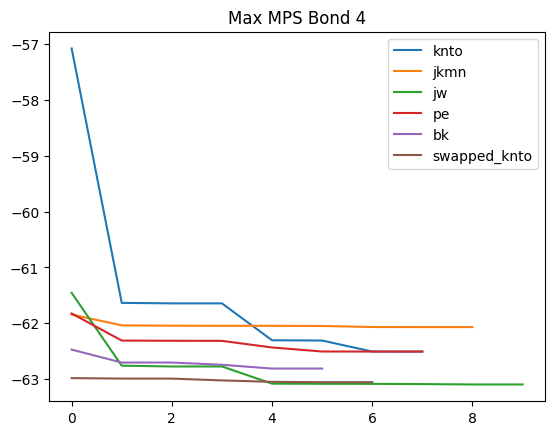

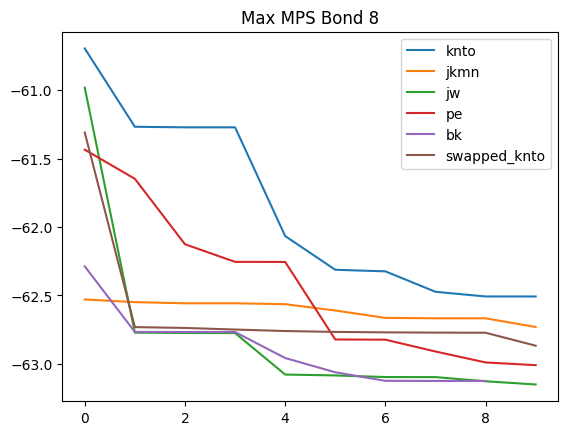

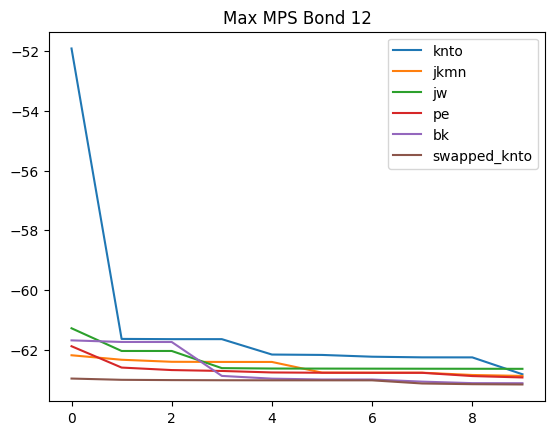

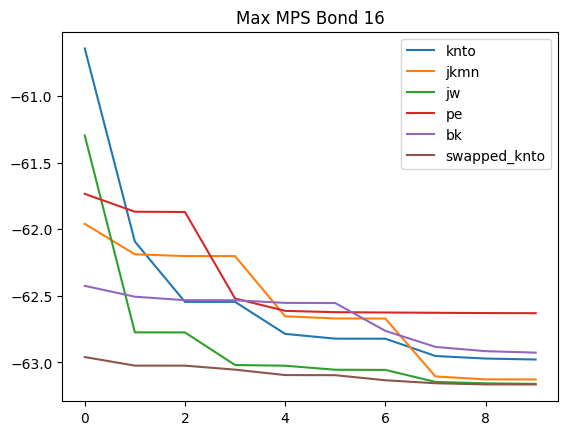

In [13]:
import matplotlib.pyplot as plt
for max_bond, set in vals.items():
    for encoding in set:
        plt.plot(set[encoding], label=encoding)
    plt.title(f"Max MPS Bond {max_bond}")
    plt.legend()
    plt.show()

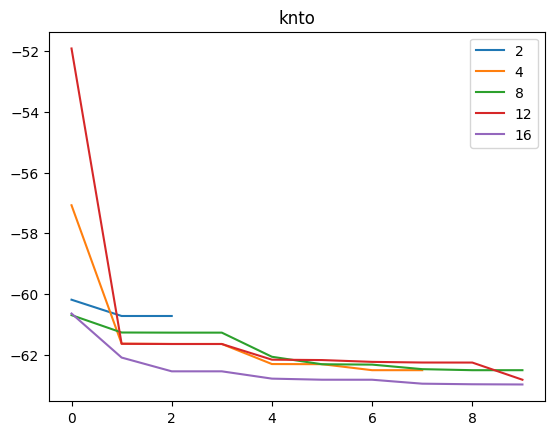

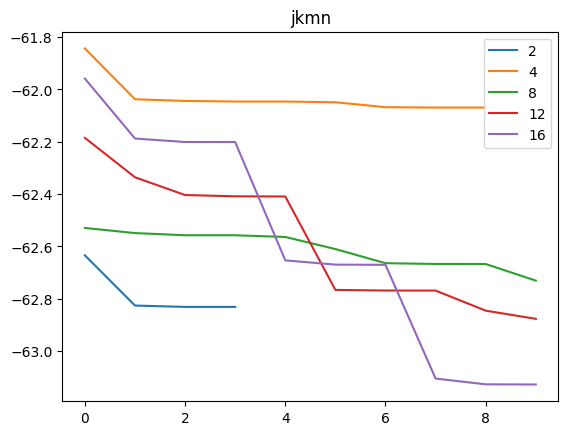

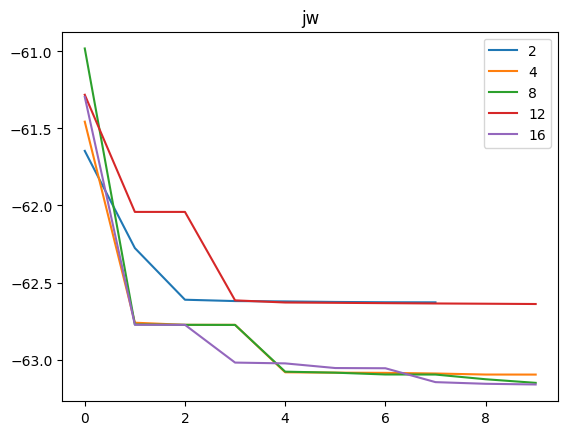

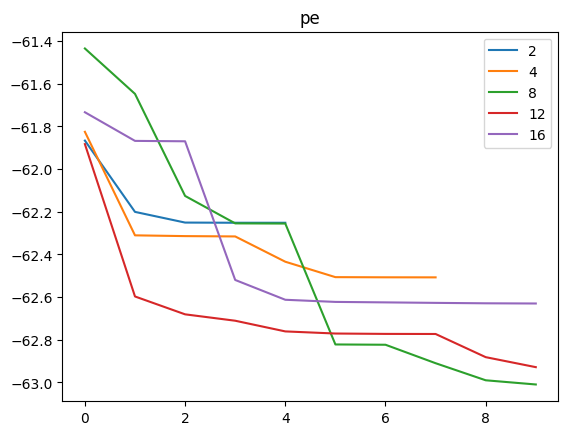

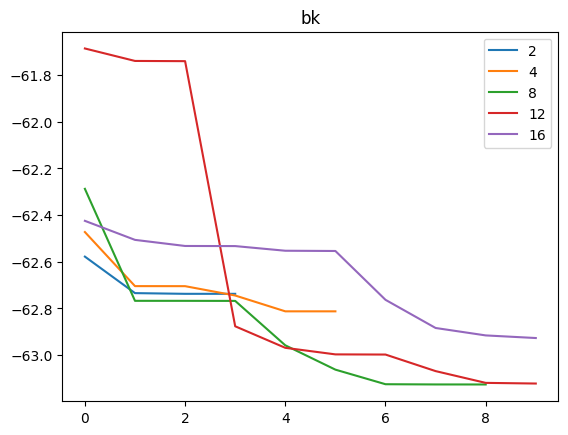

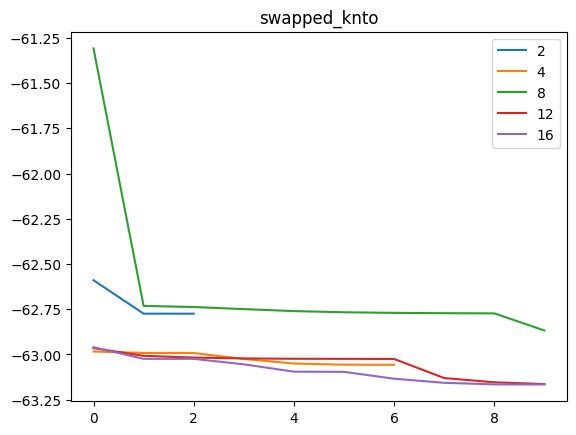

In [ ]:
import matplotlib.pyplot as plt
for encoding in two:
    for max_bond, set in vals.items():
        plt.plot(set[encoding], label=max_bond)
    plt.title(f"{encoding}")
    plt.legend()
    plt.show()